#### Librerías para el manejo de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

#### Cargo el Dataset


In [6]:
# Cargo el Dataset
dataset = pd.read_csv('titanic.csv')


#### Muestro las primeras 5 lineas

In [7]:
dataset.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S
468,469,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S


#### Cantidad de filas y columnas

In [8]:
dataset.shape

(891, 12)

#### Columnas, no nulos y tipos de datos

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Valores duplicados

In [10]:
dataset.apply(lambda x: x.duplicated().sum())

PassengerId      0
Survived       889
Pclass         888
Name             0
Sex            889
Age            802
SibSp          884
Parch          884
Ticket         210
Fare           643
Cabin          743
Embarked       887
dtype: int64

#### Valores nulos 

In [11]:
dataset.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

#### Valores unicos: osea repetidos

In [12]:
dataset.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

#### Mostrar los valores unicos de las columnas categoricas

In [13]:
columnas_categoricas= dataset.select_dtypes(include=["object"]).columns
for columna in columnas_categoricas:
    if dataset[columna].nunique()<=10:
        print(f"{columna}: {dataset[columna].unique()}")

Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]



###                                              EDA: graficos

#### Distribucion de Clases

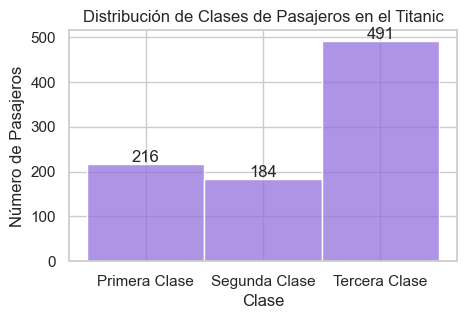

In [14]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el histograma de la columna 'clase'
plt.figure(figsize=(5, 3)) # tamaño
ax = sns.histplot(dataset['Pclass'], bins=3, discrete=True, color='MediumPurple')

# Configurar el título y etiquetas
plt.title('Distribución de Clases de Pasajeros en el Titanic')
plt.xlabel('Clase')
plt.ylabel('Número de Pasajeros')

# Añadir etiquetas en cada barra del histograma
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Cambiar las etiquetas del eje X
ax.set_xticks([1, 2, 3])  # Establece las ubicaciones de las etiquetas
ax.set_xticklabels(['Primera Clase', 'Segunda Clase', 'Tercera Clase'])  # Establece las etiquetas

# Mostrar el gráfico
plt.show()

#### Supervivencia por Clase

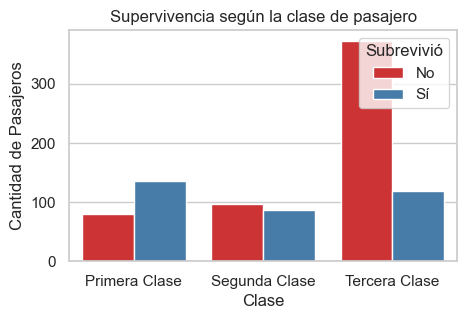

In [15]:
# Crear el gráfico de barras apiladas
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3)) # tamaño

# Crear el gráfico
grafico= sns.countplot(x='Pclass', hue='Survived', data=dataset, palette='Set1')

# Cambiar las etiquetas del eje X
grafico.set_xticks([0, 1, 2])  # Establecer las ubicaciones (índices 0, 1 y 2)
grafico.set_xticklabels(['Primera Clase', 'Segunda Clase', 'Tercera Clase'])  # Cambiar etiquetas

# Añadir títulos y etiquetas
plt.title('Supervivencia según la clase de pasajero')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Subrevivió', loc='upper right', labels=['No', 'Sí'])

# Mostrar el gráfico
plt.show()

### Distribucion de Edad

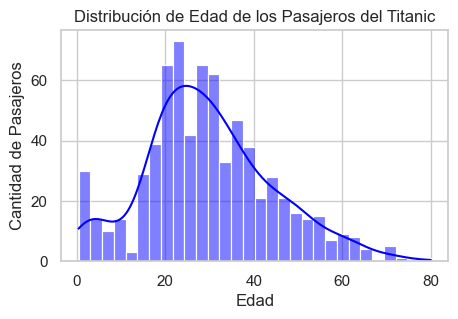

In [16]:
# Crear el grafico
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))

# Crear el histograma con KDE para la distribución de la edad
sns.histplot(data=dataset, x='Age', kde=True, bins=30, color='blue')

# Añadir títulos y etiquetas
plt.title('Distribución de Edad de los Pasajeros del Titanic')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Pasajeros')

# Mostrar el gráfico
plt.show()

#### Relacion entre edad y supervivencia

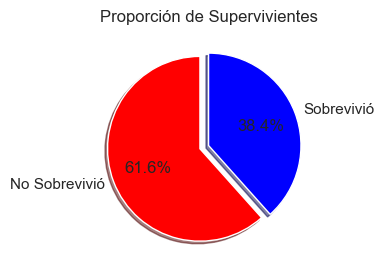

In [17]:
# Contar el número de sobrevivientes y no sobrevivientes
survival_counts = dataset['Survived'].value_counts()

# Crear los colores
colors = ["red", "blue"]

# Crear el gráfico de torta con un ángulo para simular 3D
plt.figure(figsize=(5, 3))
plt.pie(survival_counts, labels=['No Sobrevivió', 'Sobrevivió'], autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.1, 0), shadow=True)

# Añadir un título
plt.title('Proporción de Supervivientes')

# Mostrar el gráfico
plt.show()

#### Sobrevivientes por genero

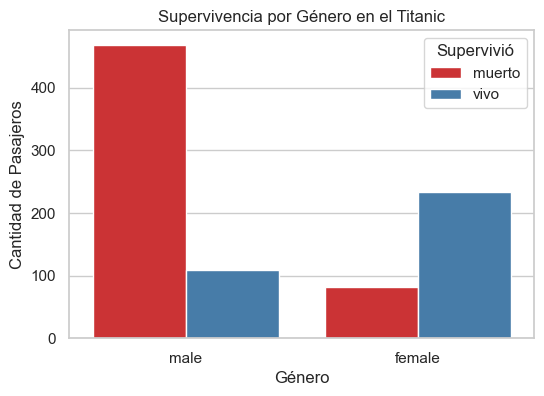

In [45]:
# Ajustar el tamaño del gráfico
plt.figure(figsize=(6, 4))

# Crear el gráfico de barras
sns.set(style="whitegrid")
ax = sns.countplot(x='Sex', hue='Survived', data=dataset, palette='Set1')

# Añadir títulos y etiquetas
plt.title('Supervivencia por Género en el Titanic')
plt.xlabel('Género')
plt.ylabel('Cantidad de Pasajeros')

# Añadir leyenda
plt.legend(title='Supervivió', loc='upper right', labels=['muerto', 'vivo'])

# Mostrar el gráfico
plt.show()

#### Hipotesis: mujeres sobrevivieron más

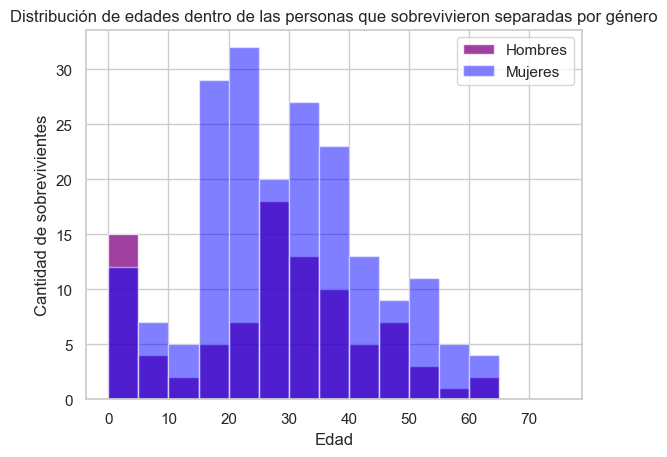

In [46]:
# Distribución de edades de los sobrevivientes por género
edad_survived_male = dataset.Age[(dataset.Survived == 1) & (dataset.Sex == 'male')]
edad_survived_female = dataset.Age[(dataset.Survived == 1) & (dataset.Sex == 'female')]

edad_survived_male.hist(bins=np.arange(0, 80, 5), label='Hombres', color='purple', alpha=0.75)
edad_survived_female.hist(bins=np.arange(0, 80, 5), label='Mujeres', color='blue', alpha=0.5)

plt.title('Distribución de edades dentro de las personas que sobrevivieron separadas por género')
plt.xlabel('Edad')
plt.ylabel('Cantidad de sobrevivientes')
plt.legend()
plt.show()

#### Distribucion Geografica

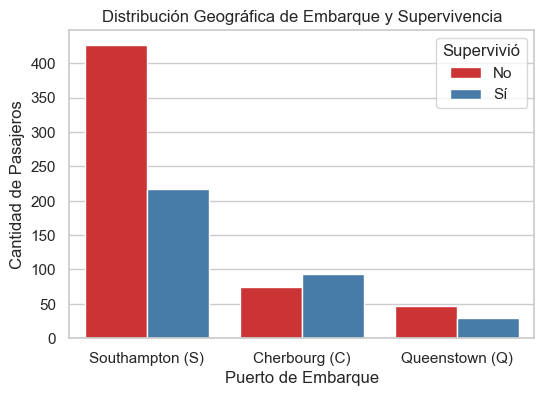

In [19]:
plt.figure(figsize=(6, 4))

# Crear el gráfico de barras
sns.countplot(x='Embarked', hue='Survived', data=dataset, palette='Set1')

# Añadir títulos y etiquetas
plt.title('Distribución Geográfica de Embarque y Supervivencia')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Cantidad de Pasajeros')

# Cambiar las etiquetas del eje X
plt.xticks(ticks=[0, 1, 2], labels=['Southampton (S)', 'Cherbourg (C)', 'Queenstown (Q)'])

# Añadir leyenda
plt.legend(title='Supervivió', loc='upper right', labels=['No', 'Sí'])

# Mostrar el gráfico
plt.show()

#### Mapa de Calor de Correlaciones


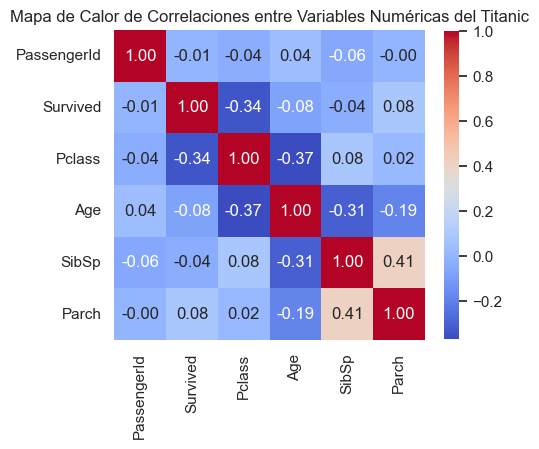

In [35]:
# Seleccionar solo las columnas numéricas
numeric_columns = dataset.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación solo con las columnas numéricas
correlation_matrix = numeric_columns.corr()

# Ajustar el tamaño del gráfico
plt.figure(figsize=(5, 5))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Añadir títulos
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas del Titanic')
plt.show()

**Conclusiones**:

1. En los pasajeros había más hombres que mujeres, dentro de los que sobrevivieron hay más mujeres que hombres.

2. Los bebes y niños tenían una probabilidad de supervivencia más grande que el resto de edades.
 
3.  En todos los rangos de edades la cantidad de gente que murio es más que los sobrevivientes.

4. En las edades que más sobrevivieron fueron 0 - 12 años
   y sobrevivieron en ese rango de edad, más niños varones


## Preparar datos para hacer predicciones

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

#### Eliminar columnas no predictoras

In [22]:
# Eliminar columnas que no se usarán para predecir
dataset = dataset.drop(columns=["Cabin", "Fare", "Ticket", "Name"])

#### Separar en Predictoras y a predecir

In [23]:
# Separar las variables predictoras (X) del target (y)
X = dataset.drop("Survived", axis=1)
y = dataset["Survived"]


#### Convertir columnas categóricas en numéricas


In [24]:
columnas_categoricas = X.select_dtypes(include=["object"]).columns
ordinal_encoder = OrdinalEncoder()
X[columnas_categoricas] = ordinal_encoder.fit_transform(X[columnas_categoricas])

#### Rellenar valores nulos

In [25]:
imputer = SimpleImputer()
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

#### Dividir el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creo el Modelo: Random Forest

In [27]:
modelo= RandomForestClassifier()
modelo.fit(X_train, y_train)

RandomForestClassifier()

#### Realizar predicciones con el conjunto de prueba


La matriz de 0 y 1 representa las predicciones hechas por tu modelo sobre los datos de prueba (df_test). 
Cada número en esa secuencia es el resultado de tu modelo prediciendo si un pasajero sobrevivió o no, donde:

0 indica que el pasajero no sobrevivió.
1 indica que el pasajero sí sobrevivió.

Así que, efectivamente, esas son las predicciones que corresponden a tu conjunto de prueba.

In [28]:
predicciones=  modelo.predict(X_test)
print(predicciones)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0]


#### Evaluar el rendimiento del modelo


In [29]:
from sklearn.metrics import accuracy_score

y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Precisión del modelo: 81.56%


#### Función para predecir si un pasajero sobrevivió o no


In [33]:
def predecir_supervivencia(pasajero):
    pasajero_df = pd.DataFrame([pasajero], columns=X.columns)

    # Convertir columnas categóricas a numéricas
    pasajero_df[columnas_categoricas] = ordinal_encoder.transform(pasajero_df[columnas_categoricas])

    # Rellenar valores nulos
    pasajero_df = pd.DataFrame(imputer.transform(pasajero_df), columns=X.columns)

    # Realizar predicción
    prediccion= modelo.predict(pasajero_df)
    return "Sobrevivió" if prediccion[0] == 1 else "No sobrevivió"

### Pasajero

In [31]:
# Ejemplo de cómo pasar los datos de un pasajero
nuevo_pasajero= {
    "Pclass": 3,        # Clase del pasajero
    "Sex": "male",      # Género
    "Age": 25,          # Edad
    "SibSp": 0,         # Número de hermanos/esposos a bordo
    "Parch": 0,         # Número de padres/hijos a bordo
    "Embarked": "S"     # Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)
}

#### Predecir si el nuevo pasajero sobrevivió o no


In [34]:
resultado= predecir_supervivencia(nuevo_pasajero)
print(f"Resultado para el nuevo pasajero:\n{resultado}")

Resultado para el nuevo pasajero:
No sobrevivió


# Analisis Explotario Titanic

In [20]:
print("Comenze el 15 de Septiembre del 2024")
print("Termine el 7 de Octubre del 2024")

print("Enzo Gonzales")

Comenze el 15 de Septiembre del 2024
Termine el 7 de Octubre del 2024
Enzo Gonzales
